Name- Saugata Ghosh, Roll- 302211001007

In [14]:
def is_valid_state(state):
    middle_index = len(state) // 2
    return state[middle_index] not in ['A', 'E']

def apply_swap(state, swap):
    x, y = swap
    state_list = list(state)
    state_list[x - 1], state_list[y - 1] = state_list[y - 1], state_list[x - 1]
    return ''.join(state_list)

def read_state_from_file(file_path):
    with open(file_path, "r") as f:
        state = f.readline().strip()
    return state

def write_output(output_file, message):
    with open(output_file, "w") as f:
        f.write(message)


The provided code is a Python program that deals with manipulating a sequence of states representing the arrangement of beer bottles. The goal is to transform the initial state of the bottles to a desired goal state using a series of swaps. Here's a brief description of each function in the code:

1. `is_valid_state(state)`: This function checks if a given state is valid according to the rules specified. It returns `True` if the middle bottle is not 'A' or 'E', and `False` otherwise.

2. `apply_swap(state, swap)`: Given a state and a swap operation (swap indices), this function applies the swap to the state and returns the updated state.

3. `read_state_from_file(file_path)`: This function reads and returns a state from a specified text file path.

4. `write_output(output_file, message)`: This function writes the provided message to the specified output file.


In [15]:
def print_intermediate_states(states, swaps):
    intermediate_output = ""
    intermediate_output += "Intermediate States:\n"
    current_state = states[0]
    intermediate_output += f"0: {current_state}\n"
    for i, swap in enumerate(swaps, start=1):
        current_state = apply_swap(current_state, swap)
        intermediate_output += f"{i}: {current_state} (Swap: {swap})\n"
    return intermediate_output

The `print_intermediate_states` function in the provided code is responsible for generating an intermediate output representation of the state transitions during the process of rearranging the beer bottles. The function takes two inputs: a list of states representing the sequence of states during the rearrangement, and a list of swaps that were applied to achieve those transitions. Here's a brief explanation of this function:

1. `states`: A list of strings representing the states at various steps of the rearrangement process.
2. `swaps`: A list of tuples, each containing two indices representing the bottles being swapped at each step.

The function iterates through the `swaps` list and applies the swaps to the current state. For each step, it generates a formatted output string that includes:
- The step number.
- The current state after applying the swaps up to that point.
- The details of the swap that led to the current state.

The intermediate output string is built incrementally by appending formatted lines for each step. The function then returns this intermediate output string.

The purpose of this function is to provide a clear representation of the intermediate steps of rearrangement, showing the sequence of states and the corresponding swaps that transform the initial state into the goal state. This output can be used for visualizing and understanding the process of rearrangement and can be written to an output file for reference.

In [16]:
def depth_limited_search(state, goal_state, depth_limit):
    if state == goal_state:
        return [], []
    if depth_limit == 0:
        return None, []
    for x in range(1, 6):
        for y in range(1, 6):
            if x != y:
                new_state = apply_swap(state, (x, y))
                if is_valid_state(new_state):
                    result, intermediate_states = depth_limited_search(new_state, goal_state, depth_limit - 1)
                    if result is not None:
                        result.insert(0, (x, y))
                        intermediate_states.insert(0, state)
                        return result, intermediate_states
    return None, []

The `depth_limited_search` function in the provided code implements a depth-limited search algorithm for finding a solution path to transform the initial state to the goal state, using a restricted maximum depth for exploration. Here's a concise description of the function's functionality:

1. `state`: The current state of the beer bottles arrangement.
2. `goal_state`: The desired goal state to be achieved.
3. `depth_limit`: The maximum depth (or number of swaps) allowed for exploration.

The function follows these steps:
1. If the current state is already the goal state, it returns an empty list for the swaps and intermediate states.
2. If the `depth_limit` has reached 0, the function returns `None` to indicate that the goal state couldn't be reached within the specified depth limit.
3. It iterates through all possible swaps between the bottles.
4. For each swap, it calculates the new state resulting from applying that swap.
5. If the new state is valid, it recursively calls `depth_limited_search` with the new state, reduced `depth_limit`, and goal state as arguments.
6. If the recursive call returns a non-None result (i.e., a solution was found), the function constructs the solution path and intermediate states list by inserting the current swap and state at the beginning of their respective lists.
7. Finally, the function returns the solution path (list of swaps) and intermediate states.

The purpose of this function is to perform a limited-depth search for a solution path, which helps control the exploration and prevents deep dives into the state space. It is part of the iterative deepening search strategy to find a solution within progressively increasing depth levels, allowing for an efficient search for the desired goal state.

In [17]:
def uniform_cost_search(state, goal_state, max_cost):
    if state == goal_state:
        return [], []
    frontier = [(state, [])]
    explored = set()
    while frontier:
        current_state, actions = frontier.pop(0)
        explored.add(current_state)
        for x in range(1, 6):
            for y in range(1, 6):
                if x != y:
                    new_state = apply_swap(current_state, (x, y))
                    if is_valid_state(new_state) and new_state not in explored and new_state not in [state for state, _ in frontier]:
                        if new_state == goal_state:
                            return actions + [(x, y)], [current_state]
                        if len(actions) + 1 <= max_cost:
                            frontier.append((new_state, actions + [(x, y)]))
    return None, []

The `uniform_cost_search` function in the provided code implements a search algorithm that aims to find the solution path with the least cost, defined as the number of swaps, to transform the initial state to the goal state. Here's a brief overview of the function's functionality:

1. `state`: The current state of the beer bottles arrangement.
2. `goal_state`: The desired goal state to be achieved.
3. `max_cost`: The maximum allowed cost (number of swaps) for the search.

The function follows these steps:
1. If the current state is already the goal state, it returns an empty list for the swaps and intermediate states.
2. The function maintains a `frontier` list of states to be explored, each associated with the actions (swaps) performed to reach that state.
3. An `explored` set keeps track of states that have already been explored.
4. The algorithm iterates through the `frontier` using a breadth-first approach.
5. For each state in the `frontier`, it checks all possible swaps between the bottles.
6. If a valid swap leads to a new state, and that new state hasn't been explored or isn't in the `frontier`, it's added to the `frontier` with the actions list updated.
7. If the goal state is reached, the function constructs and returns the solution path and intermediate states lists.
8. The algorithm continues until the `frontier` is empty, or the maximum allowed cost is exceeded.

The primary goal of this function is to find a solution path with the lowest possible cost (number of swaps) to transform the initial state to the goal state. It does so by exploring the state space while ensuring that it doesn't exceed the maximum specified cost. The algorithm utilizes a breadth-first approach to efficiently explore the search space and find an optimal solution.

In [18]:
def iterative_deepening_search(initial_state, goal_state, max_depth, output_file):
    for depth in range(1, max_depth + 1):
        result, intermediate_states = depth_limited_search(initial_state, goal_state, depth)
        if result is not None:
            with open(output_file, "w") as f:
                f.write(f"Solution found at depth {depth} using swaps: {result}\n")
                intermediate_output = print_intermediate_states([initial_state] + intermediate_states, result)
                f.write(intermediate_output)
            return result, intermediate_states
    return None, []

The `iterative_deepening_search` function in the provided code is an implementation of the iterative deepening search strategy to find a solution path within a specified depth limit. This strategy involves repeatedly performing a depth-limited search with gradually increasing depth limits. Here's a concise overview of this function's functionality:

1. `initial_state`: The initial state of the beer bottles arrangement.
2. `goal_state`: The desired goal state to be achieved.
3. `max_depth`: The maximum depth limit to explore in the iterative deepening process.
4. `output_file`: The path to the output file where the results will be written.

The function follows these steps:
1. It iterates through depths from 1 to `max_depth`, inclusive.
2. For each depth, it performs a depth-limited search using the `depth_limited_search` function.
3. If a solution is found within the specified depth, it writes the solution information and intermediate states to the output file.
4. The function returns the solution path and intermediate states if a solution is found.
5. If no solution is found within the given depth limits, it returns `None` for both the solution path and intermediate states.

The purpose of this function is to implement the iterative deepening search algorithm, which can help find a solution within a limited exploration depth. It iteratively increases the depth limit to explore gradually larger portions of the state space, ensuring that a solution is found even in larger search spaces while maintaining efficient memory usage.

The results and intermediate states are written to an output file specified by `output_file`, allowing for later analysis and visualization.

In [19]:
def iterative_lengthening_search(initial_state, goal_state, max_cost, output_file):
    current_cost = 0
    while current_cost <= max_cost:
        result, intermediate_states = uniform_cost_search(initial_state, goal_state, current_cost)
        if result is not None:
            with open(output_file, "w") as f:
                f.write(f"Solution found within cost {current_cost} using swaps: {result}\n")
                intermediate_output = print_intermediate_states([initial_state] + intermediate_states, result)
                f.write(intermediate_output)
            return result, intermediate_states
        current_cost += 1
    return None, []

The `iterative_lengthening_search` function in the provided code implements the iterative lengthening search strategy to find a solution path within a gradually increasing cost limit. This strategy explores solutions with increasing cost (number of swaps) until a valid solution is found. Here's a brief overview of this function's functionality:

1. `initial_state`: The initial state of the beer bottles arrangement.
2. `goal_state`: The desired goal state to be achieved.
3. `max_cost`: The maximum cost (number of swaps) to explore in the iterative lengthening process.
4. `output_file`: The path to the output file where the results will be written.

The function follows these steps:
1. It initializes the `current_cost` variable to 0.
2. The function enters a loop that continues until `current_cost` exceeds the `max_cost`.
3. Within the loop, it performs a uniform cost search using the `uniform_cost_search` function with the current cost.
4. If a solution is found within the current cost, it writes the solution information and intermediate states to the output file.
5. The function returns the solution path and intermediate states if a solution is found.
6. If no solution is found within the current cost, the loop continues by incrementing `current_cost`.

The purpose of this function is to implement the iterative lengthening search algorithm, which systematically increases the cost limit for exploring solutions. This strategy ensures that solutions with progressively higher costs are considered, allowing for more comprehensive exploration of the state space. The results and intermediate states are written to an output file specified by `output_file`, enabling further analysis and visualization.

In [20]:
if __name__ == "__main__":
    initial_state_file = "/content/Initial_State.txt"
    goal_state_file = "/content/Goal_State.txt"
    max_depth = 10
    max_cost = 15
    id_output_file = "iterative_deepening_output.txt"
    ils_output_file = "iterative_lengthening_output.txt"

    initial_state = read_state_from_file(initial_state_file)
    goal_state = read_state_from_file(goal_state_file)

    output_ids = ""
    output_ils = ""

    print("Using Iterative Deepening Search:")
    solution_ids, intermediate_states_ids = iterative_deepening_search(initial_state, goal_state, max_depth, id_output_file)
    if solution_ids is not None:
        print("Solution found using swaps:", solution_ids)
        intermediate_output_ids = print_intermediate_states([initial_state] + intermediate_states_ids, solution_ids)
        output_ids += f"Solution found using swaps: {solution_ids}\n"
        output_ids += intermediate_output_ids
    else:
        print("Solution not found within depth limit.")

    print("\nUsing Iterative Lengthening Search:")
    solution_ils, intermediate_states_ils = iterative_lengthening_search(initial_state, goal_state, max_cost, ils_output_file)
    if solution_ils is not None:
        print("Solution found using swaps:", solution_ils)
        intermediate_output_ils = print_intermediate_states([initial_state] + intermediate_states_ils, solution_ils)
        output_ils += f"Solution found using swaps: {solution_ils}\n"
        output_ils += intermediate_output_ils
    else:
        print("Solution not found within cost limit.")

    write_output(id_output_file, output_ids)
    write_output(ils_output_file, output_ils)

Using Iterative Deepening Search:
Solution found using swaps: [(1, 2), (1, 3), (2, 4), (2, 5)]

Using Iterative Lengthening Search:
Solution found using swaps: [(1, 2), (1, 3), (2, 4), (2, 5)]


The main part of the provided code orchestrates the execution of the iterative deepening search and iterative lengthening search algorithms on the given initial and goal states of the beer bottles arrangement problem. Here's a brief summary of this part of the code:

1. File Paths and Parameters: The initial state and goal state are read from their respective text files. Maximum depth and maximum cost are defined for iterative deepening and iterative lengthening searches, respectively. Output file names for both search strategies are specified.

2. Initialization and Output Setup: Empty strings `output_ids` and `output_ils` are initialized to store output messages and intermediate results.

3. Iterative Deepening Search: The iterative deepening search algorithm is executed with the provided initial state, goal state, and maximum depth. If a solution is found, the result is printed, and the intermediate states and swaps are formatted and added to `output_ids`.

4. Iterative Lengthening Search: The iterative lengthening search algorithm is executed with the initial state, goal state, and maximum cost. If a solution is found, the result is printed, and the intermediate states and swaps are formatted and added to `output_ils`.

5. Writing Output: The intermediate outputs for both search strategies are written to their respective output files using the `write_output` function.


In [21]:
import networkx as nx
import matplotlib.pyplot as plt

def generate_next_states(state):
    next_states = []
    for x in range(1, 6):
        for y in range(1, 6):
            if x != y:
                new_state = apply_swap(state, (x, y))
                if is_valid_state(new_state):
                    next_states.append(new_state)
    return next_states


The `generate_next_states` function in the provided code is responsible for generating all possible valid next states that can be reached from a given state in the beer bottles arrangement problem. Here's a concise overview of its functionality:

1. `state`: The current state of the beer bottles arrangement.

The function iterates through all possible combinations of swaps between the bottles. For each combination, it calculates the new state resulting from applying that swap to the current state. If the new state is valid according to the problem constraints (bottles A and E are not in the middle), it is added to the `next_states` list.

The purpose of this function is to provide a list of possible states that can be reached from the current state by performing any valid swap. These next states serve as potential options for further exploration in search algorithms and are essential for building the state space graph and visualizing the state transitions in the beer bottles arrangement problem.

In [22]:
def build_state_space_graph(initial_state):
    state_space_graph = {}
    states_to_explore = [initial_state]

    while states_to_explore:
        current_state = states_to_explore.pop(0)
        next_states = generate_next_states(current_state)

        state_space_graph[current_state] = next_states

        for state in next_states:
            if state not in state_space_graph:
                states_to_explore.append(state)

    return state_space_graph

The `build_state_space_graph` function in the provided code constructs a state space graph for the beer bottles arrangement problem. This graph represents all possible valid transitions between states achievable through swaps. Here's a brief overview of the function's functionality:

1. `initial_state`: The starting state of the beer bottles arrangement.

The function initializes an empty dictionary called `state_space_graph` to store the graph's structure. It also initializes a list called `states_to_explore` with the initial state.

The function proceeds to explore the state space by iteratively selecting states from `states_to_explore`, generating their next possible states using the `generate_next_states` function, and adding the current state along with its reachable next states to the `state_space_graph`.

The process continues until there are no more states left to explore, and the complete state space graph is built.

The primary purpose of this function is to create a comprehensive representation of the possible state transitions in the beer bottles arrangement problem. The resulting state space graph can be used for visualization, analysis, and exploration of different search strategies to find solutions to the problem.

In [23]:
def read_state_from_file(file_path):
    with open(file_path, "r") as f:
        state = f.readline().strip()
    return state


def read_path_from_file(file_path):
    swaps_line = ""
    intermediate_states = []
    with open(file_path, "r") as f:
        for line in f:
            if line.startswith("Solution found using swaps:"):
                swaps_line = line.strip()
            elif line.startswith("Intermediate States:"):
                break
            else:
                intermediate_states.append(line.strip())

    swaps = eval(swaps_line.split(": ")[-1])
    return swaps, intermediate_states

The `read_path_from_file` function in the provided code is responsible for reading the solution path and intermediate states from a text file generated during the search process. It processes the content of the file to extract the swaps that led to the solution and the intermediate states encountered along the way. Here's a concise overview of its functionality:

1. `file_path`: The path to the text file containing the search results.

The function initializes variables to store the swaps that constitute the solution path (`swaps_line`) and a list of intermediate states (`intermediate_states`).

It reads the content of the file line by line, and:
- If the line starts with "Solution found using swaps:", it extracts the swaps information from the line.
- If the line starts with "Intermediate States:", it indicates the end of the swaps section, and the function breaks out of the loop.
- Otherwise, it assumes the line contains an intermediate state and adds it to the `intermediate_states` list.

After processing the file, the function evaluates the `swaps_line` to obtain the swaps as a list and returns both the swaps and intermediate states.

The primary purpose of this function is to parse the content of a search result file, extracting the relevant information about the solution path and intermediate states. This information can then be used for analysis, visualization, and further processing.

In [24]:
def visualize_state_space_graph(state_space_graph, initial_state, goal_state, path):
    G = nx.DiGraph()
    for state, next_states in state_space_graph.items():
        G.add_node(state)
        for next_state in next_states:
            G.add_edge(state, next_state)

    pos = nx.spring_layout(G, seed=42, scale=3)
    plt.figure(figsize=(22.4, 12.6))

    # Draw nodes and edges
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=2500, node_color='skyblue', arrowsize=20)

    # Highlight start state, goal state, and path
    node_colors = ['green' if node == initial_state or node == goal_state else 'skyblue' for node in G.nodes()]
    edge_colors = ['red' if (u, v) in path or (v, u) in path else 'black' for u, v in G.edges()]

    nx.draw(
        G,
        pos,
        with_labels=True,
        font_weight='bold',
        node_size=2500,
        node_color=node_colors,
        edge_color=edge_colors,
        arrowsize=20,
        width=2,  # Adjust edge width
    )
    plt.show()


The `visualize_state_space_graph` function in the provided code is responsible for visualizing the state space graph of the beer bottles arrangement problem, highlighting specific states and edges that are relevant to the problem solution. Here's a brief summary of its functionality:

1. `state_space_graph`: The state space graph representing possible state transitions.
2. `initial_state`: The starting state of the beer bottles arrangement.
3. `goal_state`: The desired goal state to be achieved.
4. `path`: A list of edges representing the solution path in the state space graph.

The function creates a directed graph using the NetworkX library and populates it with nodes and edges based on the state space graph. It then uses a spring layout algorithm to position the nodes in a visually appealing manner.

The function enhances the visualization by:
- Drawing nodes with labels, bold font, and specified node size and color.
- Highlighting the start and goal states with a distinct color.
- Highlighting the edges that form the solution path with a different color and thicker width.

The resulting visualization provides a clear and informative representation of the state space, making it easy to identify the initial and goal states, as well as the path that leads to the solution.

The primary purpose of this function is to create a visual representation of the state space graph, emphasizing important states and edges relevant to the problem solution. This visualization aids in understanding the search process and the exploration of different search strategies.

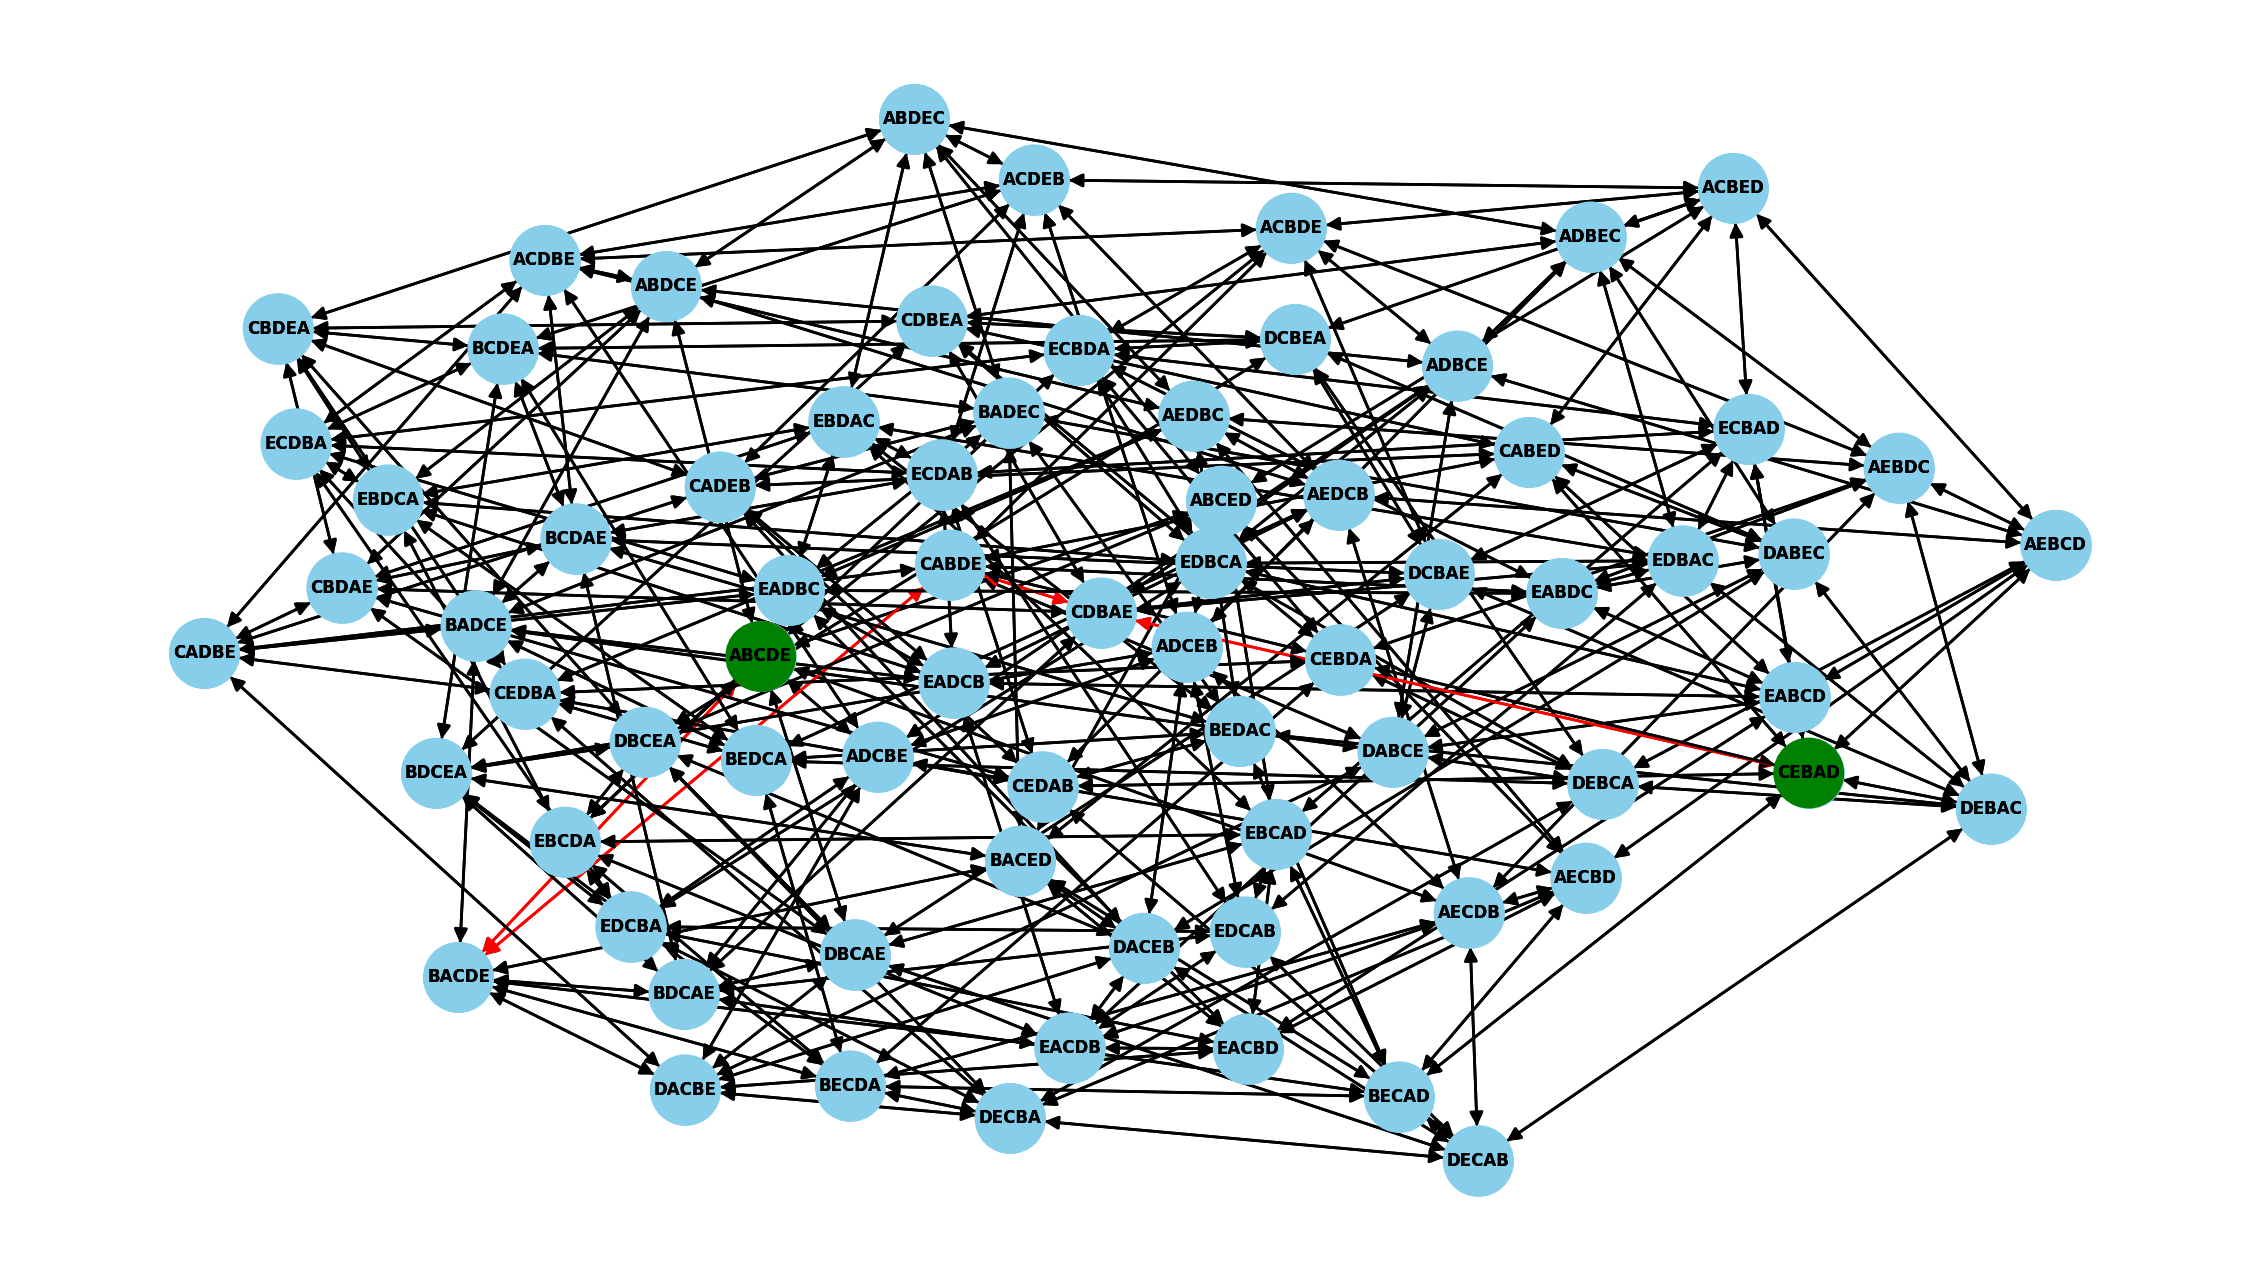

In [25]:
if __name__ == "__main__":
    start_state_file = "/content/Initial_State.txt"
    goal_state_file = "/content/Goal_State.txt"
    path_file = "/content/iterative_deepening_output.txt" # select path file from the output of the previous part

    initial_state = read_state_from_file(start_state_file)
    goal_state = read_state_from_file(goal_state_file)
    state_space_graph = build_state_space_graph(initial_state)
    swaps, intermediate_states = read_path_from_file(path_file)

    # Convert the swaps to a sequence of states
    current_state = initial_state
    path = []
    for swap in swaps:
        path.append((current_state, apply_swap(current_state, swap)))
        current_state = apply_swap(current_state, swap)

    visualize_state_space_graph(state_space_graph, initial_state, goal_state, path)

The main part of the provided code orchestrates the visualization of the state space graph for the beer bottles arrangement problem, highlighting the path taken from the initial state to the goal state. Here's a brief overview of this part of the code:

1. File Paths: The paths to the initial state file, goal state file, and the path file (containing the solution path) are specified.

2. Reading Initial and Goal States: The initial and goal states are read from their respective text files.

3. Building State Space Graph: The state space graph is constructed using the `build_state_space_graph` function based on the initial state.

4. Reading Solution Path: The swaps and intermediate states constituting the solution path are read from the path file using the `read_path_from_file` function.

5. Path Conversion: The swaps are converted into a sequence of state transitions by applying each swap to the current state and storing the resulting states in the `path` list.

6. Visualization: The `visualize_state_space_graph` function is called with the state space graph, initial state, goal state, and the path. This generates a visual representation of the state space graph, highlighting the path from the initial state to the goal state.

The main purpose of this code section is to visualize the state space graph and highlight the path taken to reach the goal state. This visualization provides an intuitive way to understand the solution path within the context of the state transitions and the state space graph.